## **Task 1 : Instructions**

Load the handedness data from the National Geographic survey and create a scatter plot.

•Import pandas as pd and matplotlib.pyplot as plt.

•Load the data into a pandas DataFrame named lefthanded_data using theprovided data_url_1. Note that the file is a CSV file.

•Use the .plot() method to create a plot of the "Male" and "Female" columns vs. "Age".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_url_1 ="https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"

In [7]:
lefthanded_data = pd.read_csv(data_url_1)

In [8]:
lefthanded_data.columns

Index(['Age', 'Male', 'Female'], dtype='object')

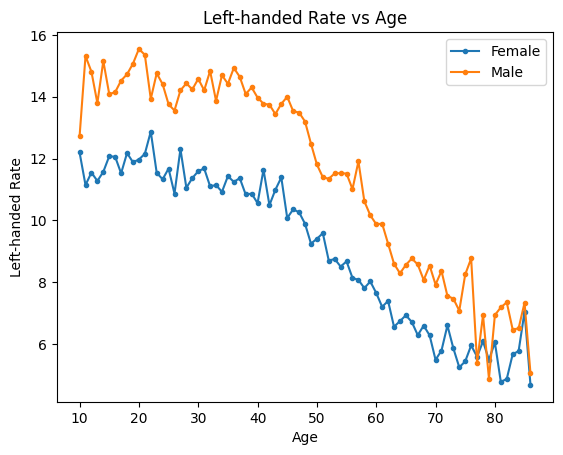

In [9]:
fig,ax =plt.subplots()
ax.plot('Age', 'Female', data = lefthanded_data, marker = '.') # plotting Age vs Female data
ax.plot('Age', 'Male', data = lefthanded_data, marker = '.')  # plotting Age vs Male data
ax.legend()
ax.set_xlabel('Age')
ax.set_ylabel('Left-handed Rate')  # Assuming 'Female' and 'Male' columns represent some kind of left-handed rate
ax.set_title("Left-handed Rate vs Age")
plt.show()

### **Task 2 : Instructions**

Add two new columns, one for birth year and one for mean left-handedness, then plot the mean as afunction of birth year.

•Create a column in lefthanded_data called Birth_year, which is equal to 1986- Age (since the study was done in 1986).

•Create a column in lefthanded_data called Mean_lh which is equal to the mean ofthe Male and Female columns.

•Use the .plot() method to plot Mean_lh vs. Birth_year.


In [10]:
# Create a new column for birth year of each age
lefthanded_data['Birth_year'] = 1986 - lefthanded_data['Age']
# create a new column for the average of male and female
lefthanded_data['Mean_lh'] = lefthanded_data[['Female','Male']].mean(axis=1)

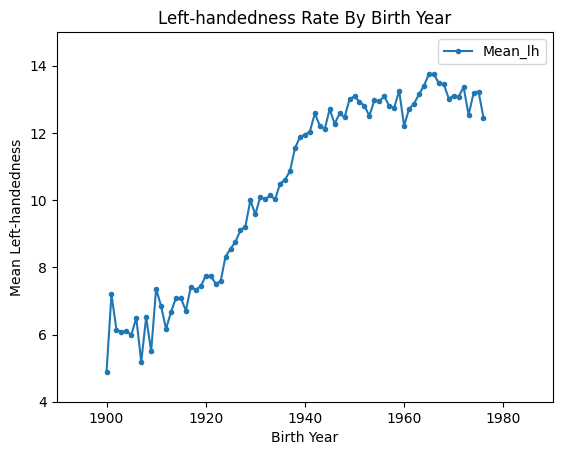

In [11]:
# Create a plot of the 'Mean_lh' column vs. 'Birth_year'
fig ,ax = plt.subplots()
ax.plot('Birth_year', 'Mean_lh', data = lefthanded_data, marker = '.')
# Set origin to zero
ax.set_xlim(1890,1990)
ax.set_ylim(4,15)
ax.legend()
ax.set_xlabel('Birth Year')
ax.set_ylabel('Mean Left-handedness')
plt.title('Left-handedness Rate By Birth Year')
plt.show()

## **Task 3 : Instructions**

Create a function that will return P(LH | A) for particular ages of death in a given study year.

•Import the numpy package aliased as np.

•Use the last ten Mean_lh data points to get an average rate for the early 1900s. Name theresulting DataFrame early_1900s_rate.

•Use the first ten Mean_lh data points to get an average rate for the late 1900s. Name theresulting DataFrame late_1900s_rate.

•For the early 1900s ages, fill in P_return with the appropriate left-handedness ratesfor ages_of_death. That is, input early_1900s_rate as a fraction, i.e., divide by 100.

•For the late 1900s ages, fill in P_return with the appropriate left-handedness ratesfor ages_of_death. That is, input late_1900s_rate as a fraction, i.e., divide by 100.When calculating early_1900s_rate and late_1900s_rate, remember that because theoriginal data was from youngest age to oldest age, that means that the data is organized from latestbirth year to earliest birth year. You will use the first ten Mean_lh data points to get an average ratefor the late 1900s and the last ten for the early 1900s.

The probability of dying at a certain age given that you’re left-handed is not equal to the probability of being left-handed given that you died at a certain age. This inequality is why we need Bayes’ theorem, a statement about conditional probability which allows us to update our beliefs after seeing evidence.

We want to calculate the probability of dying at age A given that you’re left-handed. Let’s write this in shorthand as P(A | LH). We also want the same quantity for right-handers: P(A | RH).

Here’s Bayes’ theorem for the two events we care about: left-handedness (LH) and dying at age A.


P(LH | A) is the probability that you are left-handed given that you died at age A. P(A) is the overall probability of dying at age A, and P(LH) is the overall probability of being left-handed. We will now calculate each of these three quantities, beginning with P(LH | A).

To calculate P(LH | A) for ages that might fall outside the original data, we will need to extrapolate the data to earlier and later years. Since the rates flatten out in the early 1900s and late 1900s, we’ll use a few points at each end and take the mean to extrapolate the rates on each end. The number of points used for this is arbitrary, but we’ll pick 10 since the data looks flattish until about 1910.



In [12]:
# Creating P(LH|A) function
def P_lh_given_A(age_of_death, study_year = 1990):

# Use the mean of the 10 last and 10 first points for left-handedness rates before and after the start
   early_1900s_rate = lefthanded_data['Mean_lh'] [-10:].mean()
   late_1900s_rate = lefthanded_data['Mean_lh'][:10].mean()
   middle_rates= lefthanded_data.loc[lefthanded_data['Birth_year'].isin(study_year - ages_of_death)][ 'Mean_lh']
   youngest_age = study_year - 1986 + 10
   oldest_age = study_year - 1986 - 10

   P_return = np.zeros(ages_of_death.shape)
   P_return[ages_of_death < youngest_age] = early_1900s_rate/100
   P_return[ages_of_death > oldest_age] = late_1900s_rate/100
   P_return[np.logical_and(ages_of_death >= youngest_age, ages_of_death <= oldest_age)] = middle_rates/100
   return P_return

## **Task 4 : Instructions**

Load death distribution data for the United States and plot it.

•Load death distribution data in the provided data_url_2 into death_distribution_data,setting sep = '\t' and skiprows=[1] to account for the dataset's format.

•Drop the NaN values from the Both Sexes column.

•Use the .plot() method to plot the number of people who died as a function of their age.


To estimate the probability of living to an age A, we can use data that gives the number of people who died in a given year and how old they were to create a distribution of ages of death. If we normalize the numbers to the total number of people who died, we can think of this data as a probability distribution that gives the probability of dying at age A. The data we’ll use for this is from the entire US for the year 1999 — the closest I could find for the time range we’re interested in.

In this block, we’ll load in the death distribution data and plot it. The first column is the age, and the other columns are the number of people who died at that age.



In [13]:
# Death distribution data for the United States in 1999
data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"

Index(['Age', 'Both Sexes', 'Male', 'Female'], dtype='object')


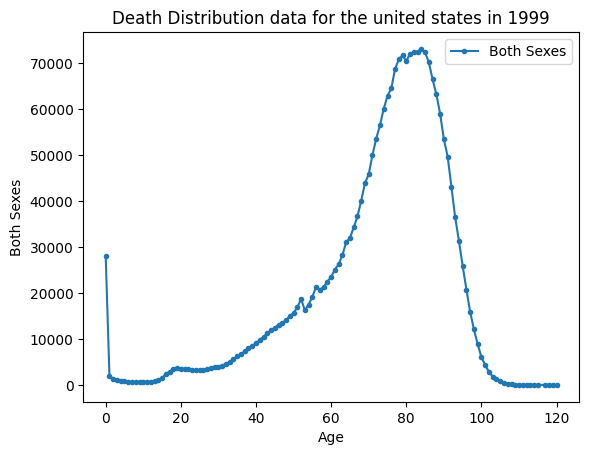

In [16]:
# Load Death distribution data
death_distribution_data = pd.read_csv(data_url_2, sep = '\t', skiprows=[1])

# Check the actual column names in the DataFrame
print(death_distribution_data.columns)

# Drop NaN values from the correct "Both Sexes" column
# Note: Replace 'Both Sexes' with the actual column name from the print output if it's different
death_distribution_data = death_distribution_data.dropna(subset=['Both Sexes'])

# Plot the number of people who died as a function of their age
fig, ax = plt.subplots()
ax.plot('Age','Both Sexes', data = death_distribution_data, marker='.') # plot 'Both Sexes' vs. 'Age'
ax.legend()
plt.title("Death Distribution data for the united states in 1999")
ax.set_xlabel('Age')
ax.set_ylabel('Both Sexes')
plt.show()

## **Task 5 : Instructions**

Create a function called P_lh() which calculates the overall probability of left-handedness in thepopulation for a given study year.

•Create a series, p_list, by multiplying the number of dead people in the BothSexes column with the probability of their being lefthanded using P_lh_given_A().

•Set the variable p equal to the sum of that series.

•Divide p by the total number of dead people by summing death_distribution_data overthe Both Sexes column. Return result from the function.P(LH | A) was defined in Task 3. N(A) is the value of Both Sexes inthe death_distribution_data DataFrame where the Age column is equal to A. Thedenominator is total number of dead people, which you can get by summing over the entiredataframe in the Both Sexes column

In the previous code block we loaded data to give us P(A), and now we need P(LH). P(LH) is the probability that a person who died in our particular study year is left-handed, assuming we know nothing else about them. This is the average left-handedness in the population of deceased people, and we can calculate it by summing up all of the left-handedness probabilities for each age, weighted with the number of deceased people at each age, then divided by the total number of deceased people to get a probability. In equation form, this is what we’re calculating, where N(A) is the number of people who died at age A (given by the dataframe death_distribution_data)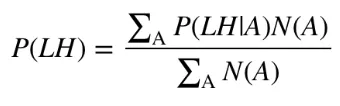

In [23]:
def P_lh_given_A(ages_of_death, study_year):
    # Assuming 'lefthanded_data' is a global variable or passed as a parameter
    # Calculate rates based on birth years
    middle_rates = lefthanded_data.loc[lefthanded_data['Birth_year'].isin(study_year - ages_of_death), 'Mean_lh']
    # Additional calculations (not shown)
    return middle_rates

def P_lh(death_distribution_data, study_year=1990):
    """ Overall probability of being left-handed if you die in the study year
    Input : dataframe of death distribution data, study year
    Output : P(LH), a single floating point number """

    # Multiply number of dead people by P_lh_given_A
    p_list = death_distribution_data['Both Sexes'] * P_lh_given_A(death_distribution_data['Age'], study_year)

    # Calculate the sum of p_list
    p = np.sum(p_list)

    # Normalize to total number of people (sum of death_distribution_data['Both Sexes'])
    return p / np.sum(death_distribution_data['Both Sexes'])

print(P_lh(death_distribution_data))

3.758515324917373


## **Task 6 : Instructions**

Write a function to calculate P_A_given_lh().

•Calculate P_A, the overall probability of dying at age A, which is givenby death_distribution_data at age A divided by the total number of dead people (thesum of the Both Sexes column of death_distribution_data).

•Calculate the overall probability of left-handedness P(LH) using the function defined in Task 5.

•Calculate P(LH | A) using the function defined in Task 3.


Now we have the means of calculating all three quantities we need: P(A), P(LH), and P(LH | A). We can combine all three using Bayes’ rule to get P(A | LH), the probability of being age A at death (in the study year) given that you’re left-handed. To make this answer meaningful, though, we also want to compare it to P(A | RH), the probability of being age A at death given that you’re right-handed.

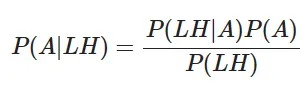

In [25]:
def P_A_given_lh(ages_of_death ,death_distribution_data ,study_year = 1990):
  """ The overall probability of being a particular 'age_of_death' given that you're left-handed """
  P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
  P_left =P_lh(death_distribution_data ,study_year)
  P_lh_A = P_lh_given_A(death_distribution_data ,study_year)
  return P_lh_A * P_A / P_left

## **Task7 : Instructions**

Write a function to calculate P_A_given_rh().

•Calculate P_A, the overall probability of dying at age A, which is givenby death_distribution_data at age A divided by the total number of dead people. (Thisvalue is the same as in task 6.)

•Calculate the overall probability of right-handedness P(RH), which is 1-P(LH).

•Calculate P(RH | A), which is 1 - P(LH | A).


In [28]:
def P_A_given_rh(ages_of_death ,death_distribution_data ,study_year = 1990):
  """ The overall probability of being a particular 'age_of_death' given that you're right-handed """
  P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
  P_right =1 - P_lh(death_distribution_data ,study_year)
  P_rh_A = 1- P_lh_given_A(ages_of_death ,study_year) # P_rh_A = 1 - P_lh_A
  return P_rh_A * P_A / P_right

## **Task 8 : Instructions**

Plot the probability of being a certain age at death given that you're left- or right-handed for a rangeof ages.

•Calculate P_A_given_lh and P_A_given_rh using the functions defined in Task 6.

•Use the .plot() method to plot the results versus age.

In [52]:
print("Left-handed probabilities:", left_handed_probability)
print("Right-handed probabilities:", right_handed_probability)

Left-handed probabilities: 0      0.048531
1      0.003689
2      0.002541
3      0.001829
4      0.001571
         ...   
110         NaN
111         NaN
112         NaN
113         NaN
114         NaN
Length: 115, dtype: float64
Right-handed probabilities: 0      0.048531
1      0.003689
2      0.002541
3      0.001829
4      0.001571
         ...   
110         NaN
111         NaN
112         NaN
113         NaN
114         NaN
Length: 115, dtype: float64


In [53]:
print("Length of left-handed probabilities:", len(left_handed_probability))
print("Length of right-handed probabilities:", len(right_handed_probability))
print("Length of ages:", len(ages))

Length of left-handed probabilities: 115
Length of right-handed probabilities: 115
Length of ages: 115


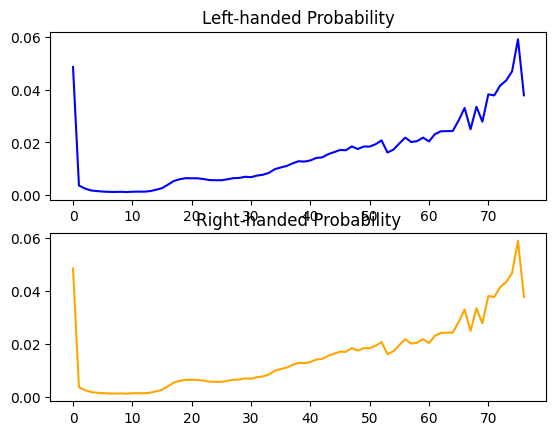

In [54]:
fig, ax = plt.subplots(2, 1)  # Two subplots
ax[0].plot(ages, left_handed_probability, label="Left-handed", color='blue')
ax[1].plot(ages, right_handed_probability, label="Right-handed", color='orange')
ax[0].set_title("Left-handed Probability")
ax[1].set_title("Right-handed Probability")
plt.show()

Left-handed probabilities: 0      0.048531
1      0.003689
2      0.002541
3      0.001829
4      0.001571
         ...   
110         NaN
111         NaN
112         NaN
113         NaN
114         NaN
Length: 115, dtype: float64
Right-handed probabilities: 0      0.048531
1      0.003689
2      0.002541
3      0.001829
4      0.001571
         ...   
110         NaN
111         NaN
112         NaN
113         NaN
114         NaN
Length: 115, dtype: float64
Length of left-handed probabilities: 115
Length of right-handed probabilities: 115
Length of ages: 115


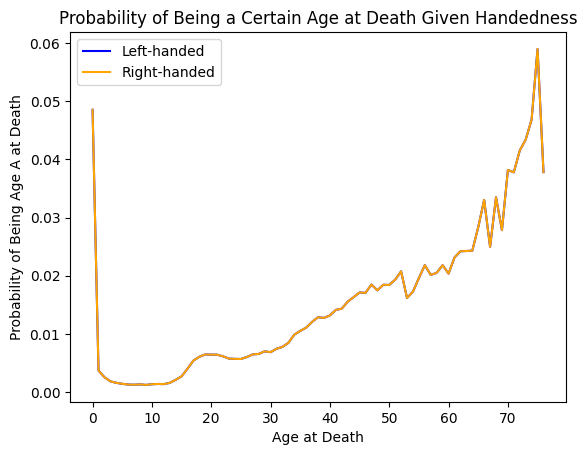

In [55]:
# Define a consistent age range for all calculations
ages = np.arange(0, 115, 1)

# Calculate probabilities using the consistent age range
left_handed_probability = P_A_given_lh(ages, death_distribution_data)
right_handed_probability = P_A_given_rh(ages, death_distribution_data)

# Print the probability arrays for debugging
print("Left-handed probabilities:", left_handed_probability)
print("Right-handed probabilities:", right_handed_probability)

# Check the lengths of the probability arrays
print("Length of left-handed probabilities:", len(left_handed_probability))
print("Length of right-handed probabilities:", len(right_handed_probability))
print("Length of ages:", len(ages))

# Create the plot
fig, ax = plt.subplots()
ax.plot(ages, left_handed_probability, label="Left-handed", color='blue')
ax.plot(ages, right_handed_probability, label="Right-handed", color='orange')
ax.legend()  # Add a legend
plt.title("Probability of Being a Certain Age at Death Given Handedness")
ax.set_xlabel("Age at Death")
ax.set_ylabel("Probability of Being Age A at Death")

# Show the plot
plt.show()  # Show the plot

## **Task 9 : Instructions**

Find the mean age at death for left-handers and right-handers.

•Multiply the ages list by the left-handed probabilities of being those ages at death, thenuse np.nansum to calculate the sum. Assign the result to average_lh_age.

•Do the same with the right-handed probabilities to calculate average_rh_age.

•Print average_lh_age and average_rh_age.

•Calculate the difference between the two average ages and print it.

To make your printed output prettier, try using the round() function to round your results to twodecimal places.

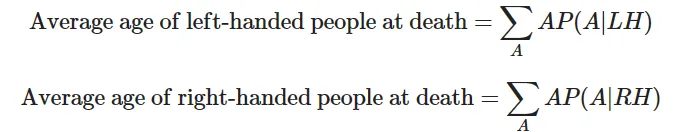

In [50]:
# Calculate average ages for left-handed and right-handed groups

average_lh_age = np.nansum(ages * np.array(left_handed_probability))
average_rh_age = np.nansum(ages * np.array(right_handed_probability))

print("Average age of lefthanded"" :" + str(average_lh_age))
print("Average age of righthanded"" :" + str(average_rh_age))
print("The difference in average ages is " + str(round(average_rh_age - average_lh_age ,1)) + " years.")

Average age of lefthanded :62.9425503735137
Average age of righthanded :62.9425503735137
The difference in average ages is 0.0 years.


## **Task 10 : Instructions**

Redo the calculation from Task 8, setting the study_year parameter to 2018.

•In the call to P_A_given_lh,set age_of_death to ages, death_distribution_data to death_distribution_data, and study_year to 2018.

•Do the same for P_A_given_rh.

We got a pretty big age gap between left-handed and right-handed people purely as a result of the changing rates of left-handedness in the population, which is good news for left-handers: you probably won’t die young because of your sinisterness. The reported rates of left-handedness have increased from just 3% in the early 1900s to about 11% today, which means that older people are much more likely to be reported as right-handed than left-handed, and so looking at a sample of recently deceased people will have more old right-handers.

Our number is still less than the 9-year gap measured in the study. It’s possible that some of the approximations we made are the cause:

1.We used death distribution data from almost ten years after the study (1999 instead of 1991), and we used death data from the entire United States instead of California alone (which was the original study).

2.We extrapolated the left-handedness survey results to older and younger age groups, but it’s possible our extrapolation wasn’t close enough to the true rates for those ages.

To finish off, let’s calculate the age gap we’d expect if we did the study in 2018 instead of in 1990. The gap turns out to be much smaller since rates of left-handedness haven’t increased for people born after about 1960. Both the National Geographic study and the 1990 study happened at a unique time — the rates of left-handedness had been changing across the lifetimes of most people alive, and the difference in handedness between old and young was at its most striking.



In [51]:
# Calculate the probability of being left - or right - handed for all ages
left_handed_probability_2018 = P_A_given_lh(ages, death_distribution_data , 2018)
right_handed_probability_2018 = P_A_given_rh(ages, death_distribution_data , 2018)

# Calculate average ages for left-handed and right-handed groups
average_lh_age_2018 = np.nansum(ages*np.array(left_handed_probability_2018))
average_rh_age_2018 = np.nansum(ages*np.array(right_handed_probability_2018))

print("The difference in average ages is " +
      str(round(average_rh_age_2018 - average_lh_age_2018 ,1))+  " years.")

The difference in average ages is 0.0 years.
